<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/M1-UML-nomads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dimensionality Reduction and Clustering
## Nomad Cities around the World

In this tutorial we are going to play with dimensionality reduction and clustering using a nomadlist dataset. The data describes 780 cities around the world and includes variables interesting for nomads traveling to these destinations.
Features include: internet speed, cost variables and socio-political indicators.

### Reading data and libraries

In [71]:
!pip install umap-learn -q

     |████████████████████████████████| 88 kB 5.7 MB/s 
     |████████████████████████████████| 1.1 MB 34.6 MB/s 


In [54]:
# loading standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import altair as alt

import seaborn as sns
sns.set()

In [16]:
# reading in the data
data = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/cities.csv')

For convenience, we already included some easier to work with geo-variables (e.g. country-code, region and sub-region)

In [3]:
data.head()

,place,alpha-2,region,sub-region,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,...,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
0,Budapest,HU,Europe,Eastern Europe,1364.0,152.41,1273.0,1.73,1.73,1.0,...,52.7,28.17,1.0,0.27,0.6,0.40,0.80,0.86,1.00,0.0
1,Chiang Mai,TH,Asia,South-eastern Asia,777.0,98.88,780.0,0.85,0.85,0.8,...,78.8,44.53,0.8,0.60,0.6,0.40,0.62,0.75,0.40,0.0
2,Phuket,TH,Asia,South-eastern Asia,1012.0,155.43,1714.0,1.41,1.41,0.8,...,78.8,44.53,0.6,0.80,0.6,0.42,0.60,0.75,0.82,0.0
3,Bangkok,TH,Asia,South-eastern Asia,1197.0,131.41,1158.0,2.12,2.12,1.0,...,78.8,44.53,0.8,0.80,1.0,0.42,0.82,0.72,1.00,0.0
4,Ko Samui,TH,Asia,South-eastern Asia,1352.0,169.56,1347.0,1.41,1.41,0.8,...,78.8,44.53,0.8,0.80,1.0,0.40,0.80,0.80,0.80,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   place                   780 non-null    object 
 1   alpha-2                 780 non-null    object 
 2   region                  780 non-null    object 
 3   sub-region              780 non-null    object 
 4   cost_nomad              780 non-null    float64
 5   cost_coworking          780 non-null    float64
 6   cost_expat              780 non-null    float64
 7   coffee_in_cafe          780 non-null    float64
 8   cost_beer               780 non-null    float64
 9   places_to_work          780 non-null    float64
 10  free_wifi_available     780 non-null    float64
 11  internet_speed          780 non-null    float64
 12  freedom_score           780 non-null    float64
 13  peace_score             780 non-null    float64
 14  safety                  780 non-null    fl

### Preprocessing for UML

Typical pre-processing steps for UML include different forms of scaling. This is similar to supervised approaches.
- Standard scaling: Data will have a mean of 0 and σ of 1
- Min-max scaling: Features are scaled to a range, typically 0, 1

In [19]:
# We select only numerical features from the dataframe
# naming is in anticipation of future clustering
data_to_cluster = data.iloc[:,4:]

In [21]:
# import and instantiate scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
# learn x-y relationships (principal components) and transform
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

In [24]:
# very similar syntax for min-max scaling
from sklearn.preprocessing import MinMaxScaler
scaler_min_max = MinMaxScaler()

In [25]:
data_to_cluster_minmax = scaler_min_max.fit_transform(data_to_cluster)

In [27]:
data_to_cluster

,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,free_wifi_available,internet_speed,freedom_score,peace_score,...,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
0,1364.0,152.41,1273.0,1.73,1.73,1.0,0.4,31.0,0.6,0.8,...,52.7,28.17,1.0,0.27,0.6,0.40,0.80,0.86,1.00,0.0
1,777.0,98.88,780.0,0.85,0.85,0.8,0.6,14.0,0.2,0.4,...,78.8,44.53,0.8,0.60,0.6,0.40,0.62,0.75,0.40,0.0
2,1012.0,155.43,1714.0,1.41,1.41,0.8,0.4,14.0,0.2,0.4,...,78.8,44.53,0.6,0.80,0.6,0.42,0.60,0.75,0.82,0.0
3,1197.0,131.41,1158.0,2.12,2.12,1.0,1.0,24.0,0.2,0.4,...,78.8,44.53,0.8,0.80,1.0,0.42,0.82,0.72,1.00,0.0
4,1352.0,169.56,1347.0,1.41,1.41,0.8,0.4,15.0,0.2,0.4,...,78.8,44.53,0.8,0.80,1.0,0.40,0.80,0.80,0.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,3461.0,243.51,2463.0,3.00,3.00,0.2,0.2,2.0,0.6,0.4,...,86.2,25.81,0.2,0.20,0.4,0.00,0.40,0.31,0.20,0.0
776,2833.0,288.58,2013.0,2.04,2.04,0.4,0.2,0.0,0.6,0.2,...,91.0,29.94,0.2,0.20,0.4,0.40,0.20,0.22,0.20,0.0
777,2525.0,201.55,1148.0,2.48,2.48,0.4,0.4,3.0,0.2,0.2,...,96.4,57.89,0.2,0.20,0.8,0.00,0.40,0.22,0.20,0.0
778,1162.0,215.73,1079.0,2.65,2.65,0.4,0.2,2.0,0.2,0.2,...,110.8,81.35,0.2,0.20,0.2,0.00,0.20,0.01,0.20,0.0


#### Let's check how our data look pre/post scaling

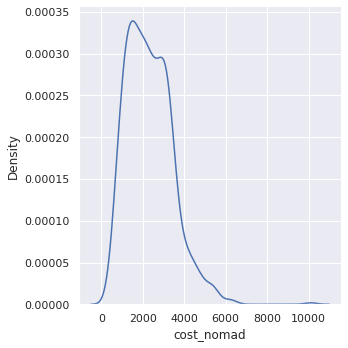

In [29]:
# nomad-cost (pre-scaling)
sns.displot(data=data_to_cluster, 
            x="cost_nomad",
            kind="kde")

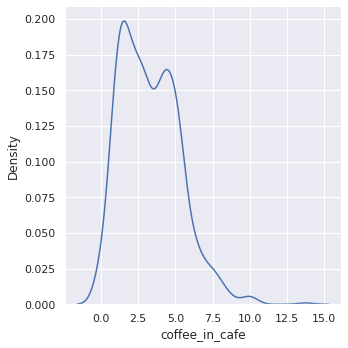

In [32]:
# coffee (pre-scaling)
sns.displot(data=data_to_cluster, 
            x="coffee_in_cafe",
            kind="kde")

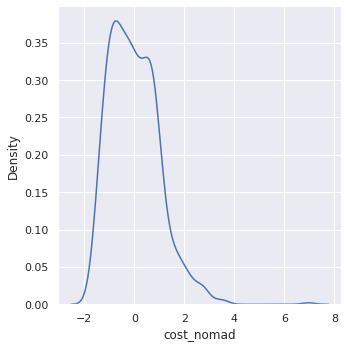

In [30]:
# cost-nomad (post-scaling)
sns.displot(data=pd.DataFrame(data_to_cluster_scaled, columns=data_to_cluster.columns), 
            x="cost_nomad",
            kind="kde")

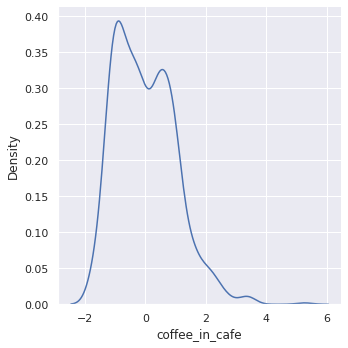

In [31]:
# coffee (post-scaling)
sns.displot(data=pd.DataFrame(data_to_cluster_scaled, columns=data_to_cluster.columns), 
            x="coffee_in_cafe",
            kind="kde")

### Dimensionality reduction with PCA

PCA was invented in 1901 by Karl Pearson, as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by Harold Hotelling in the 1930s. (Source: Wikipedia)

In [58]:
%%html
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Stitch Fix is using something called eigenvector decomposition, a concept from quantum mechanics, to tease apart the overlapping “notes” in an individual’s style. Using physics, the team can better understand the complexities of the clients’ style minds. <a href="https://t.co/iULGyYsd5c">https://t.co/iULGyYsd5c</a></p>&mdash; WIRED (@WIRED) <a href="https://twitter.com/WIRED/status/1181437300414275584?ref_src=twsrc%5Etfw">October 8, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

For a deep dive into PCA, please consider [this chapter](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

In [33]:
# load up and instantiate PCS
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [34]:
# fit-transform the data
data_reduced_pca = pca.fit_transform(data_to_cluster_scaled)

In [35]:
print(pca.components_)

[[-0.22891712 -0.14960662 -0.20835128 -0.26086894 -0.26086894 -0.16909877
  -0.19500894 -0.16308974 -0.27979964 -0.25784738 -0.23399419  0.29781565
   0.24681298 -0.23986979 -0.25361215 -0.16916249  0.02086022 -0.15138054
  -0.29669807 -0.18270597 -0.09003328]
 [ 0.40449949  0.37133791  0.32413649  0.34075444  0.34075444 -0.18972503
  -0.14097083 -0.00801675 -0.04300177 -0.0862492  -0.18895218  0.00579668
   0.01146036 -0.13402714 -0.12530843 -0.31268159  0.0013067  -0.2223101
  -0.20473368 -0.18830487 -0.04329852]]


In [36]:
pca.components_.shape

(2, 21)

In [38]:
print(pca.explained_variance_ratio_)

[0.39473688 0.0943341 ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


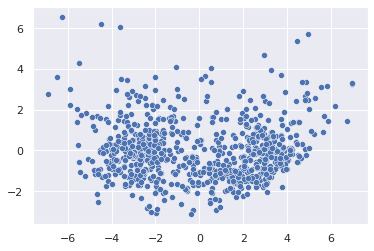

In [39]:
# we can now plot the reduced data
sns.scatterplot(data_reduced_pca[:,0],data_reduced_pca[:,1])

Let's make a more informative plot using altair and bringing some data back into the picture

In [42]:
vis_data = pd.DataFrame(data_reduced_pca)
vis_data['place'] = data['place']
vis_data['country'] = data['alpha-2']
vis_data.columns = ['x', 'y', 'place', 'country']

In [43]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['place', 'country']
).interactive()

alt.Chart(...)

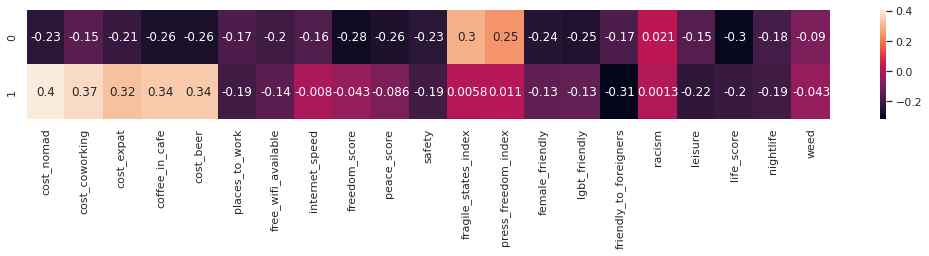

In [49]:
plt.figure(figsize=(18,2))
sns.heatmap(pd.DataFrame(pca.components_, columns=data_to_cluster.columns), annot=True)

From looking at the components, we can "see" that while the 1st is capturing political features (i.e. freedom and fragility), the second is bringing together all cost-variables (that are correlated)

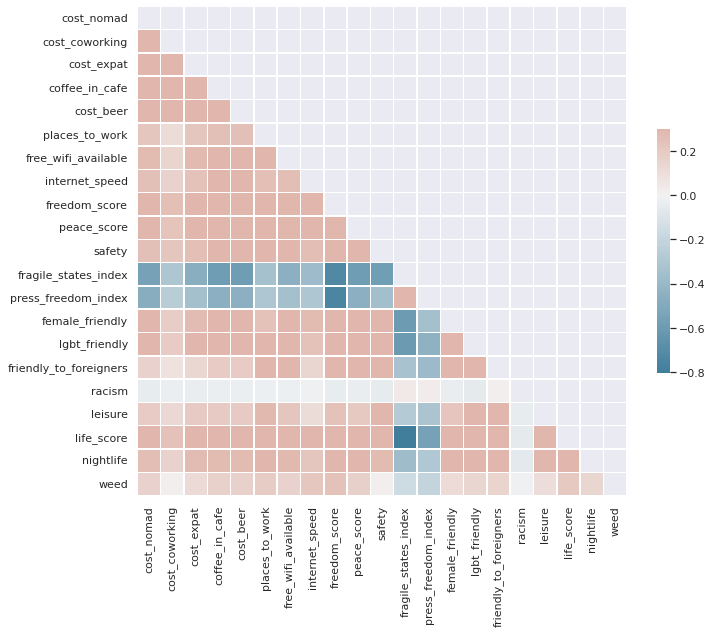

In [53]:
#quick correlation check

# Compute the correlation matrix
corr = data_to_cluster.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

I also very much recommend you to follow [this tutorial](https://youtu.be/52d7ha-GdV8) where you will learn to implement PCA starting out with the math and building your own module.

In [59]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/52d7ha-GdV8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Dimensionality Reduction with NMF

NMF is another popular dimensinality reduction technique based on matrix-decomposition. One advantage here is that components are often "more equal" in their importance. It is a more modern technique and is often very good at capturing latent paterns in data.

The number of components is a bit of a "debated issue" and as with many things in UML (that is also debatable) more of a choice of the analyst.

In [61]:
# import nmf
from sklearn.decomposition import NMF

In [62]:
# instantiate with 4 components
nmf = NMF(n_components=4)

In [64]:
# notice, we are using the min-max scaled data
data_reduced_nmf = nmf.fit_transform(data_to_cluster_minmax)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [65]:
data_reduced_nmf.shape

(780, 4)

In [66]:
nmf.components_.shape

(4, 21)

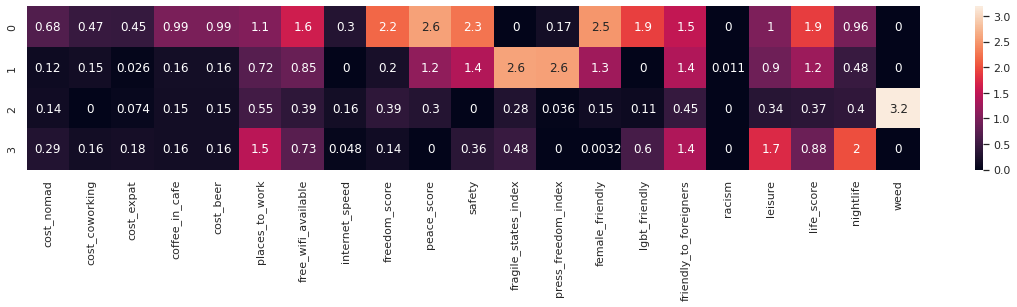

In [68]:
plt.figure(figsize=(20,3))
sns.heatmap(pd.DataFrame(nmf.components_, columns=data_to_cluster.columns), annot=True)

### Moving into more modern algorithms

In the recent years more advanced algos evolved and are being used for dimensionality reduction and visualization. t-SNE was popular around 2016 but then "replaced" by UMAP.

In [72]:
import umap

In [74]:
# we totally could specify more than 2 dimensions (as well as some other parameters)
umap_scaler = umap.UMAP()

In [75]:
# umap accepts standard-scaled data
embeddings = umap_scaler.fit_transform(data_to_cluster_scaled)

umap reduced data is often called "embeddings" which brings it terminology-wise closer to deep learning approaches. Probably this is because it is sometimes used in combination with modern NLP techniques like SBERT.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


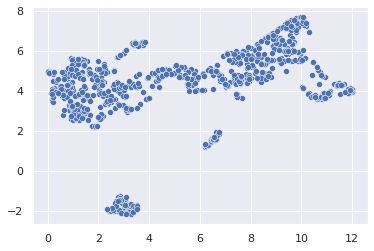

In [77]:
# just as PCA, umap reduced data can be plottet
sns.scatterplot(embeddings[:,0],embeddings[:,1])

Umap combines global and local features for deminsionality reduction with axis representing a combination of features that often align well with "human intuation" about data.

In [88]:
vis_data = pd.DataFrame(embeddings)
vis_data['place'] = data['place']
vis_data['country'] = data['alpha-2']
vis_data.columns = ['x', 'y', 'place', 'country']

In [89]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['place', 'country']
).interactive()

alt.Chart(...)

## Clustering

Similar to dimensionality reduction, clustering aims at identifying latent patterns in the data. In addition, clustering algorithms sort data into (simetimes) predefined clusters.

There exist many different approaches to clustering. One of the most used ones is K-means.

For a deep-dive, consider [this chapter](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

Consider also [this tutorial](https://youtu.be/vtuH4VRq1AU) where you learn how to implement the algorithm from scratch (starting with the math) in Python.

In [90]:
from sklearn.cluster import KMeans
clusterer = KMeans(n_clusters=3)

The number of clusters is a bit of a hot topic.
The "elbow method" is still widely used for "estimating" the optimal number. It looks at _inertia_ as a measure of clustering quality and suggest to use the number where an "elbow" can be seen when plotting inertia values for different $n\_cluster$.

In [91]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_to_cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)

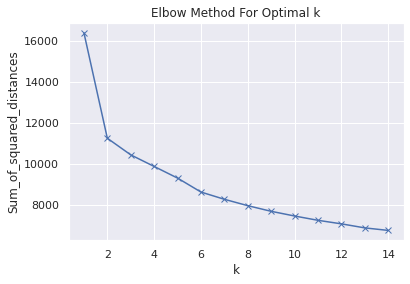

In [92]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

clustering can and sometimes is used together with dimensionality reduction.
In the end, it's about how much the used combination of approaches create representations of the data that are useful for the analysis.

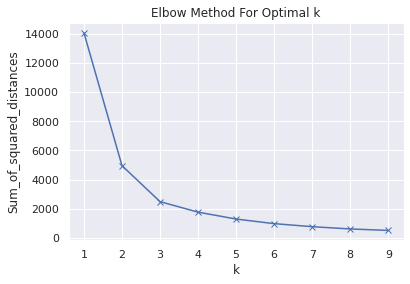

In [94]:
umap_scaler_km = umap.UMAP(n_components=6)
embeddings_km = umap_scaler.fit_transform(data_to_cluster_scaled)


Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(embeddings_km)
    Sum_of_squared_distances.append(km.inertia_)


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [97]:
# back to our k-means instance. We take 3 clusters on non-reduced data
clusterer.fit(data_to_cluster_scaled)

KMeans(n_clusters=3)

In [115]:
# we can then copy the cluster-numbers into the original file and start exploring
data['cluster'] = clusterer.labels_

In [99]:
# e.g. which cluster seems most lgbt-friendly 🌈
data.groupby('cluster').lgbt_friendly.mean()

cluster
0    0.345776
1    0.721516
2    0.477073
Name: lgbt_friendly, dtype: float64

Let's combine clustering with our UMAP embeedings in the viz.

In [116]:
vis_data = pd.DataFrame(embeddings)
vis_data['place'] = data['place']
vis_data['cluster'] = data['cluster']
vis_data['country'] = data['alpha-2']
vis_data.columns = ['x', 'y', 'place', 'cluster','country']

In [117]:
alt.Chart(vis_data).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['place', 'country'],
    color=alt.Color('cluster:N', scale=alt.Scale(scheme='dark2')) #use N after the var to tell altair that it's categorical
).interactive()

alt.Chart(...)

## Similarity and distance

contenc based recommendation is often based on UML concepts and logic: e.g. "here are 5 similar products"
That's different from collaborative filtering, which leverages the behavioural patterns of some users to show "others like you have also..."

How can we find good recommendations? Show similar observations!

**Eucledian Distance**

![](https://upload.wikimedia.org/wikipedia/commons/5/55/Euclidean_distance_2d.svg)

**We can extend that from 2D to n-D**

$d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{(u_1 - v_1)^2 + (u_2 - v_2)^2 ... (u_n - v_n)^2}$

For instance, we can calculate ED of
$\vec{u} = (2, 3, 4, 2)$ 

and
$\vec{v} = (1, -2, 1, 3)$

$\begin{align} d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{(2-1)^2 + (3+2)^2 + (4-1)^2 + (2-3)^2} \\ d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{1 + 25 + 9 + 1} \\ d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = \sqrt{36} \\ d(\vec{u}, \vec{v}) = \| \vec{u} - \vec{v} \| = 6 \end{align}$


In [120]:
# Let's use the NMF reduction


print(data_reduced_nmf[0,:])
print(data_reduced_nmf[1,:])

[0.18603675 0.14353333 0.01050765 0.27311675]
[0.12798593 0.23079848 0.         0.16495118]


In [119]:
# Let's try
from math import sqrt

In [121]:
# by hand
sqrt((0.18603675-0.12798593)**2 + (0.14353333-0.23079848)**2 + (0.01050765-0)**2 + (0.27311675-0.16495118)**2)

0.15098114236268814

In [136]:
# with numpy
np.linalg.norm(data_reduced_nmf[0,:] - data_reduced_nmf[1,:])

0.1509811536318433

In [141]:
np.linalg.norm(data_reduced_nmf[0,:] - data_reduced_nmf[2,:])

0.08485811854226064

In [139]:
data['place'][:3]

0      Budapest
1    Chiang Mai
2        Phuket
Name: place, dtype: object

In [142]:
# or easier
from sklearn.metrics.pairwise import euclidean_distances

In [171]:
euclidean_matrix = euclidean_distances(data_reduced_nmf)

In [172]:
np.argsort(euclidean_matrix[0,:])[:3]

array([  0, 644, 367])

In [174]:
data[data['place']=='Aalborg']

,place,alpha-2,region,sub-region,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,...,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed,cluster
588,Aalborg,DK,Europe,Northern Europe,4220.0,587.57,2496.0,7.22,7.22,0.6,...,8.89,1.0,0.8,0.8,1.0,0.6,0.8,0.8,0.0,1


In [175]:
ixs = np.argsort(euclidean_matrix[588,:])[:10]
print(data['place'][ixs])

588      Aalborg
261      Haarlem
270       Lugano
607    Jyvaskyla
391       Bergen
200    Vancouver
606     Helsinki
159      Dunedin
188     Victoria
604        Turku
Name: place, dtype: object


In [185]:
def recommender_city(place, n_recs):
  if place in list(set(data.place)):
    ix = data[data['place']==place].index[0]
    ixs = np.argsort(euclidean_matrix[ix,:])[:n_recs]
    print(data['place'][ixs])
  else:
    print('Place not in the dataset')

In [189]:
recommender_city('Malaga', 10)

140              Malaga
145                 Ibi
139            A Coruna
46     Colorado Springs
144          Ciutadella
55               Tucson
54              Orlando
52              Phoenix
82                 Reno
15                 Brno
Name: place, dtype: object
